<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Lyrics_Classification_TFID_(Dataset5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [620]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [621]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2/TFID


In [622]:
dataset = pd.read_csv('Lyrical_data_5.csv',encoding='cp1252')

In [623]:
dataset.head(10)

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love
5,6,Through the dark,"You tell me that you hurt, it's all in vain\nB...",Inspiration
6,7,Sober,"I don't know, I don't know, I don't know, I do...",Sad
7,8,Happier,Walking down 29th and Park\nI saw you in anoth...,Love
8,9,Save my life,Life can get you down so I just numb the way i...,Inspiration
9,10,Shape of you,The club isn't the best place to find a lover\...,Love


In [624]:
lyrics = dataset['Chorus']
lyrics

0      Diana,\rLet me be the one to light a fire insi...
1      Don't forget where you belong\rHome\rDon't for...
2      I'm sorry if I say, "I need you"\nBut I don't ...
3      I don't care what people say when we're togeth...
4      Better than words\rMore than a feeling Crazy i...
                             ...                        
795    You've got every right\r\nTo a beautiful life\...
796    I'm only one call away\r\nI'll be there to sav...
797    It started with a kiss on your mama's couch\r\...
798    I warned myself that I shouldn't play with fir...
799    I'll admit, I was wrong, what else can I say, ...
Name: Chorus, Length: 800, dtype: object

In [625]:
dataset.dropna(how='all', axis=1, inplace=True)

Checking the empty rows in dataset

In [626]:
print (dataset.isnull().sum())

Song_ID       0
Song_Title    0
Chorus        0
Emotion       0
dtype: int64


In [627]:
modifiedDF = dataset.dropna()
modifiedDF

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Love
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love
...,...,...,...,...
795,796,Who says,You've got every right\r\nTo a beautiful life\...,Inspiration
796,797,One call away,I'm only one call away\r\nI'll be there to sav...,Inspiration
797,798,Cheating on you,It started with a kiss on your mama's couch\r\...,Sad
798,799,I warned myself,I warned myself that I shouldn't play with fir...,Sad


In [628]:
modifiedDF['Chorus'].apply(lambda x: len(x.split(' '))).sum()
#We have 42,081 words in data

42081

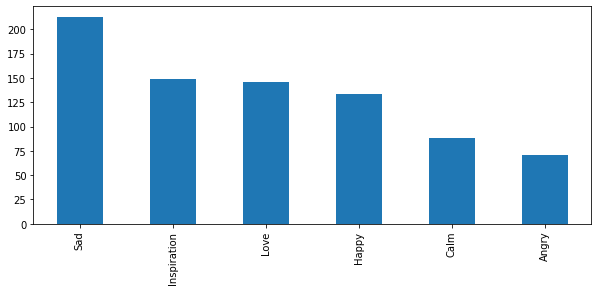

In [629]:
my_emotions = ['Happy','Sad','Calm','Inspiration','Angry','Love']
plt.figure(figsize=(10,4))
modifiedDF.Emotion.value_counts().plot(kind='bar');

In [630]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 799):
  Lyrics = re.sub('[^a-zA-Z]', ' ', modifiedDF['Chorus'][i])
  Lyrics = Lyrics.lower()
  Lyrics = Lyrics.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('down')
  all_stopwords.remove("y")
  all_stopwords.remove("i")
  # all_stopwords.remove('over')
  # all_stopwords.remove('under')
  # all_stopwords.remove('no')
  # all_stopwords.remove('only')
  # all_stopwords.remove("don't")
  # all_stopwords.remove("aren't")
  # all_stopwords.remove("o")
  # all_stopwords.remove("ma")
  # all_stopwords.remove("didn't")
  # all_stopwords.remove("can")
  # all_stopwords.remove("be")
  # all_stopwords.remove("to")
  # all_stopwords.remove("for")
  # all_stopwords.remove("you")
  # all_stopwords.remove("your")
  # all_stopwords.remove("we")
  # all_stopwords.remove("our")
  # all_stopwords.remove("my")
  # all_stopwords.remove("you're")
  Lyrics = [ps.stem(word) for word in Lyrics if not word in set(all_stopwords)]
  Lyrics = ' '.join(Lyrics)
  corpus.append(Lyrics)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [631]:
modifiedDF['Chorus'].apply(lambda x: len(x.split(' '))).sum()
#We have 24,461 words in data

42081

In [632]:
print(all_stopwords)

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

Print corpus

In [633]:
print(corpus)

['diana let one light fire insid eye lone even know i feel cri diana let one lift heart save life i think even realiz babi save mine', 'forget belong home forget belong home ever feel alon never proof song', 'i sorri i say i need i care i not scare love caus i not i weaker wrong wrong make strong', 'i care peopl say togeth know i wanna one hold sleep i want i forev i know wanna leav common babi happili', 'better word feel crazi love danc ceil everi time touch i shook make wanna deep love god know babi', 'tell hurt vain i see heart love i rememb laugh let laugh burn even scream shout come back back oh i carri fire water love i hold closer hope heart strong enough night come down find way dark', 'i know i know i know i know i everi everi everi time i lone sometim i wanna cave i wanna fight i tri i tri i tri i tri i tri hold i lone momma i sorri i not sober anymor daddi pleas forgiv drink spill floor one never left down road i sorri i not sober anymor i not sober anymor i sorri i i promis

Creating the bag of words modal

In [634]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 475)
X = cv.fit_transform(corpus).toarray()
y = modifiedDF.iloc[0:799, -1].values

Splitting the dataset into the Training set and Test set

In [635]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

Naive Bayes classifier for multinomial models

In [636]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [637]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.56875
              precision    recall  f1-score   support

       Happy       1.00      0.23      0.38        13
         Sad       0.83      0.33      0.48        15
        Calm       0.53      0.42      0.47        19
 Inspiration       0.53      0.53      0.53        32
       Angry       0.64      0.47      0.54        30
        Love       0.54      0.86      0.66        51

    accuracy                           0.57       160
   macro avg       0.68      0.47      0.51       160
weighted avg       0.62      0.57      0.55       160

CPU times: user 12.2 ms, sys: 1.02 ms, total: 13.2 ms
Wall time: 14.4 ms


Linear support vector machine

In [638]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=10, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=10,
                               tol=None))])

In [639]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.51875
              precision    recall  f1-score   support

       Happy       0.73      0.62      0.67        13
         Sad       0.46      0.40      0.43        15
        Calm       0.33      0.53      0.41        19
 Inspiration       0.50      0.47      0.48        32
       Angry       0.48      0.50      0.49        30
        Love       0.64      0.57      0.60        51

    accuracy                           0.52       160
   macro avg       0.53      0.51      0.51       160
weighted avg       0.54      0.52      0.52       160

CPU times: user 15.2 ms, sys: 2.27 ms, total: 17.4 ms
Wall time: 19.5 ms


Logistic regression

In [640]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=2, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=2))])

In [641]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.5
              precision    recall  f1-score   support

       Happy       0.50      0.62      0.55        13
         Sad       0.43      0.40      0.41        15
        Calm       0.36      0.47      0.41        19
 Inspiration       0.53      0.50      0.52        32
       Angry       0.41      0.40      0.41        30
        Love       0.63      0.57      0.60        51

    accuracy                           0.50       160
   macro avg       0.48      0.49      0.48       160
weighted avg       0.51      0.50      0.50       160

CPU times: user 15.1 ms, sys: 221 µs, total: 15.3 ms
Wall time: 16.2 ms


BOW with keras

In [642]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [643]:
train_size = int(len(modifiedDF) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(modifiedDF) - train_size))

Train size: 480
Test size: 320


In [644]:
train_posts = modifiedDF['Chorus'][:train_size]
train_tags = modifiedDF['Emotion'][:train_size]

test_posts = modifiedDF['Chorus'][train_size:]
test_tags = modifiedDF['Emotion'][train_size:]

In [645]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [646]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [647]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [648]:
from tensorflow.keras.utils import to_categorical

In [649]:
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [650]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (480, 1000)
x_test shape: (320, 1000)
y_train shape: (480, 6)
y_test shape: (320, 6)


In [651]:
# batch_size = 50
# epochs = 100 # Accuracy - 46.25

# batch_size = 50
# epochs = 50 #Accuracy - 43.75 (validation split - 0.2)

# batch_size = 50
# epochs = 10 #45.83

# batch_size = 50
# epochs = 2 # 34.58

batch_size = 50
epochs = 20 # 47.91

# batch_size = 100
# epochs = 20 # 46.66

# batch_size = 50
# epochs = 500 # 44.99

In [652]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [653]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 1s 27ms/step - loss: 1.7546 - accuracy: 0.2396 - val_loss: 1.8090 - val_accuracy: 0.2604
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 1.4609 - accuracy: 0.5104 - val_loss: 1.8062 - val_accuracy: 0.2083
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 1.2508 - accuracy: 0.6406 - val_loss: 1.7520 - val_accuracy: 0.3021
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 1.0371 - accuracy: 0.7682 - val_loss: 1.6935 - val_accuracy: 0.3125
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 0.8647 - accuracy: 0.8594 - val_loss: 1.6541 - val_accuracy: 0.3438
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.7194 - accuracy: 0.9062 - val_loss: 1.6167 - val_accuracy: 0.3646
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.5788 - accuracy: 0.9505 - val_loss: 1.5969 - val_accuracy: 0.3646
Epoch 8/20
8/8 [=================

In [654]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 3ms/step - loss: 1.7241 - accuracy: 0.4031
Test accuracy: 0.40312498807907104
